In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random.seed(100)

In [3]:
#Upload data, simple datacleaning
dataset = pd.read_csv('/Users/vladpivovarov/Documents/Python/Udemy-2/5.Data/P39-Financial-Data.csv')

In [4]:
#EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
#Cleaning data
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [7]:
dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

IndexError: single positional indexer is out-of-bounds

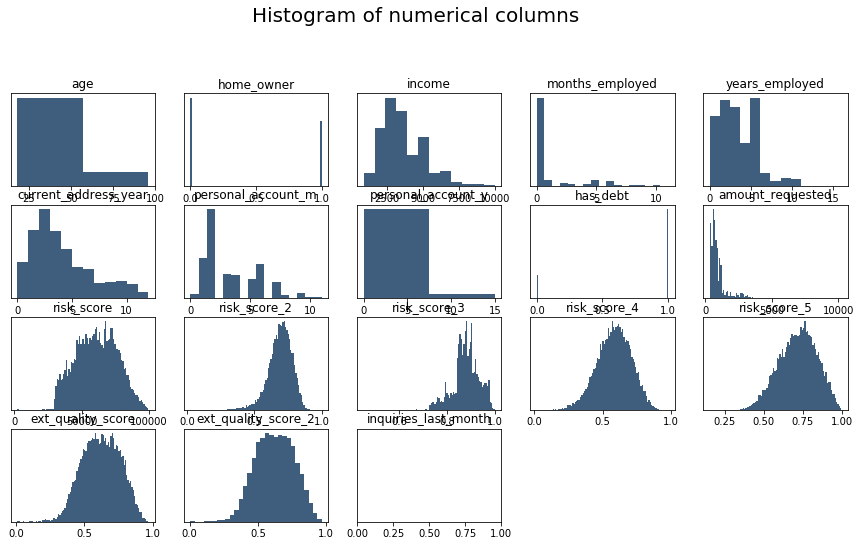

In [8]:
# Needed older version of Sns - bad code
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histogram of numerical columns', fontsize = 20)
for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:,i].unique())
    if vals > 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:,i - 1], bins = vals, color = '#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    

In [ ]:
#Correlations Plot
dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize=(20,10), title='Correlation with e_signed', fontsize=15, rot=45, grid=True)

In [ ]:
#Correlation Matrix
sns.set(style='white')
corr = dataset2 .corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5)

In [16]:
#Feature Engineering
dataset = dataset.drop(columns=['months_employed'])

In [17]:
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y*12))

In [18]:
dataset[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [19]:
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])

In [20]:
#One Hot Encoding
dataset = pd.get_dummies(dataset)

In [21]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [22]:
dataset = dataset.drop(columns=['pay_schedule_semi-monthly'])

In [23]:
#Remove extra columns
response = dataset['e_signed']
users = dataset['entry_id']
dataset = dataset.drop(columns=['e_signed','entry_id'])

In [24]:
dataset.columns

Index(['age', 'home_owner', 'income', 'years_employed', 'current_address_year',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month',
       'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_weekly'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                   response,
                                                   test_size=0.2,
                                                   random_state=0)

In [26]:
#Feature Scaling
sc_X = StandardScaler()

In [27]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values 

X_train = X_train2
X_test = X_test2 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [28]:
#Model Building
#Logistic Regression

classifier = LogisticRegression(random_state=0, penalty='l1')

In [29]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
#Predicting
y_pred = classifier.predict(X_test)

In [31]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
results = pd.DataFrame([['Logistic Regression (lasso)', acc, prec, rec, f1]],
             columns=['Model','Accuracy','Precision','Recall','F1 Score'])

In [33]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.561977,0.575963,0.705913,0.634351


In [34]:
#SVM (Linear)

classifier = SVC (random_state=0, kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
             columns=['Model','Accuracy','Precision','Recall','F1 Score'])

In [35]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.568398,0.577769,0.735996,0.647354


In [36]:
results = results.append(model_results, ignore_index=True)

In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


In [38]:
#SVM (rbf)

classifier = SVC (random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
             columns=['Model','Accuracy','Precision','Recall','F1 Score'])

results = results.append(model_results, ignore_index=True)

In [39]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505


In [40]:
#Random Forest (n=100)
classifier = RandomForestClassifier(random_state=0, n_estimators=100,
                                   criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
             columns=['Model','Accuracy','Precision','Recall','F1 Score'])

results = results.append(model_results, ignore_index=True)

In [41]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948


In [42]:
#K-Fold Cross Validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,
                            cv = 10)
print('Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)' % (accuracies.mean(), accuracies.std()*2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


In [88]:
#Round 1: Entropy
parameters = {'max_depth':[3,None], 
             'max_features':[1,5,10],
             'min_samples_split':[2,5,10 ],
             'min_samples_leaf':[1,5,10],
             'bootstrap':[True,False],
             'criterion':['entropy']}

In [ ]:
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=parameters,
                          scoring='accuracy',
                          cv=10)
t0=time.time()
grid_search = grid_search.fit(X_train, y_train)
t1=time.time()
print('Time %0.2f seconds' %(t1-t0))

In [ ]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

In [ ]:
#Round 2: Entropy - the same result
# parameters = {'max_depth':[None], 
#              'max_features':[3,5,7],
#              'min_samples_split':[8,10,12],
#              'min_samples_leaf':[1,2,3],
#              'bootstrap':[True],
#              'criterion':['entropy']}

In [ ]:
# y_pred = grid_earch.predict(X_test)

# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# model_results = pd.DataFrame([['Random Forest (n=100, Grid Search + Entropy)', acc, prec, rec, f1]],
#              columns=['Model','Accuracy','Precision','Recall','F1 Score'])

# results = results.append(model_results, ignore_index=True)

In [44]:
final_results = pd.concat([y_test,users], axis=1).dropna()
final_results['prediction'] = y_pred
final_results = final_results[['entry_id','e_signed','prediction']]

In [46]:
final_results.head()

,entry_id,e_signed,prediction
8,6493191,1.0,0
9,8908605,1.0,1
12,6889184,1.0,0
16,9375601,0.0,1
18,8515555,1.0,1
